In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\donjo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv("spam_ham_dataset.csv",encoding = 'unicode_escape')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

In [5]:
df.shape

(5171, 4)

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [7]:
df.rename(columns={'label':'target'},inplace=True)
df.sample(5)

,Unnamed: 0,target,text,label_num
4899,4135,spam,"Subject: hi hunnie cavalry\r\nhey , my name is...",1
2252,1206,ham,"Subject: enron actuals for july 14 thru 16 , 2...",0
3989,29,ham,Subject: potential well head - january 2000\r\...,0
332,3222,ham,"Subject: hpl nom for may 11 , 2001\r\n( see at...",0
2254,3621,ham,Subject: fw : cell phones\r\nhere ' s the late...,0


In [8]:
df.drop(columns=['Unnamed: 0','label_num'], inplace=True)

In [9]:
df.sample()

,target,text
3487,ham,"Subject: hpl nom for june 28 , 2000\r\n( see a..."


In [10]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(3)

,target,text
797,0,Subject: fw : how to settle the election\r\ni ...
129,1,Subject: ? r s ? ? ? ? ? ??? apaliourg @ i...
2270,0,Subject: revised noms - gathering contracts\r\...


In [11]:
#number of null values in the dataset
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
df['num_ch'] = df['text'].apply(len)

df[df.duplicated()].sort_values(by =['text']).tail(20)

,target,text,num_ch
821,0,"Subject: tenaska iv\r\nrick ,\r\nattached are ...",1182
4719,0,Subject: tenaska iv - - cleburne march 2001\r\...,96
4255,0,Subject: tenaska iv 10 / 00\r\na revised amoun...,1321
4820,0,Subject: tenaska iv 10 / 00\r\nwe have actuals...,920
1319,0,Subject: tenaska iv gas management agreement (...,640
4503,0,Subject: tenaska iv outage update\r\nfyi .\r\n...,601
4637,0,Subject: tenaska iv outage update\r\nplease no...,1348
3320,0,Subject: tenaska iv receivables\r\ndaren :\r\n...,2181
5043,0,"Subject: tenaska iv texas partners , ltd .\r\n...",1119
3799,0,Subject: txu fuels / sds nomination for april ...,342


Since the duplicate values are not very robust, we are continuing alone with the same data without removing the duplicates.

## 2. Exploratory Data Analysis


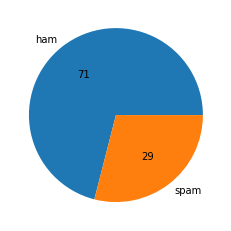

In [13]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.f')
plt.show()

## 3. Data Preprocessing

* Lower Case
* Tokenization
* Removal of special characters
* Removing stop words and punctuation
* Stemming

In [14]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [15]:
df['transformed_text'] = df['text'].apply(transform_text)

In [16]:
df.head()

,target,text,num_ch,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,subject indian spring deal book teco pvr reven...


## 4. Model Building

In [17]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [18]:
X.shape

(5171, 3000)

In [19]:
y = df['target'].values

In [20]:
y.shape[0]

5171

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [22]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9497584541062802
[[690  39]
 [ 13 293]]
0.8825301204819277


In [23]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))